In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn import datasets, linear_model
%matplotlib inline 
%matplotlib nbagg

/Users/wannyin/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from __future__ import print_function
print(__doc__)

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

Automatically created module for IPython interactive environment


In [3]:
df = pd.read_csv('how_df.csv',low_memory=False,index_col=False)

In [4]:
new_df = pd.DataFrame()

s = ["price","Entire home/apt","bathrooms","Zillow_Rent_Index","bedrooms","cleaning_fee",
    "availability","accommodates","last_review_time","duration","guests_included",
    "review_scores_rating","extra_people","security_deposit","beds","maximum_nights",
    "minimum_nights","host_acceptance","host_response","review_scores_location",
    "verification_method"]


new_df = df.loc[:,s]

In [5]:
df = new_df
df.head()

,price,Entire home/apt,bathrooms,Zillow_Rent_Index,bedrooms,cleaning_fee,availability,accommodates,last_review_time,duration,...,review_scores_rating,extra_people,security_deposit,beds,maximum_nights,minimum_nights,host_acceptance,host_response,review_scores_location,verification_method
0,65.0,0,1.0,1904,1.0,10.0,0.945205,2,21,678.0,...,92.0,10.0,0.0,1.0,1125,1,0.5,1.0,10.0,4
1,125.0,1,1.0,1904,1.0,75.0,0.920548,3,6,819.0,...,92.0,0.0,0.0,1.0,21,3,1.0,1.0,10.0,4
2,79.0,1,1.0,1904,1.0,25.0,0.835616,4,19,153.0,...,98.0,10.0,0.0,2.0,1125,1,1.0,1.0,10.0,4
3,59.0,0,1.0,1904,1.0,17.0,0.802740,4,2,484.0,...,97.0,10.0,0.0,1.0,1125,1,1.0,1.0,10.0,4
4,99.0,1,1.0,1904,1.0,40.0,0.906849,4,25,1223.0,...,97.0,10.0,0.0,2.0,330,3,1.0,1.0,10.0,3


In [6]:
#list(df.columns.values)

In [7]:
# Use only one feature
df_X = df.iloc[:,1:]
#df_X['offset'] =1 
df_y = df.iloc[:,0]
n = len(df_y)

# Split the data into training/testing sets
df_X_train = df_X[:-int(0.2*n)]
df_X_test = df_X[-int(0.2*n):]

# Split the targets into training/testing sets
df_y_train = df_y[:-int(0.2*n)]
df_y_test = df_y[-int(0.2*n):]

/Users/wannyin/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/wannyin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:454: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/wannyin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


<IPython.core.display.Javascript object>


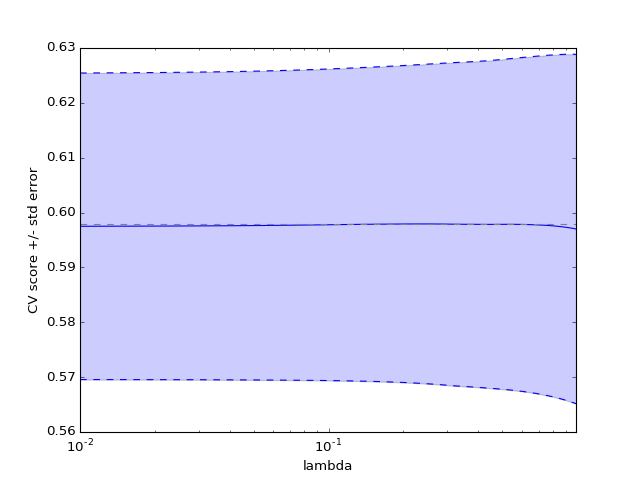

In [8]:
lasso = Lasso(random_state=0)
alphas = [i/100.0 for i in range(100)]

scores = list()
scores_std = list()

n_folds = 5

for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_val_score(lasso, df_X_train, df_y_train, cv=n_folds, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

scores, scores_std = np.array(scores), np.array(scores_std)

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + 2*std_error, 'b--')
plt.semilogx(alphas, scores - 2*std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + 2*std_error, scores - 2*std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('lambda')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]]);

Variance score: 0.64
Coefficients: 
 [  5.13589293e+01   3.08019044e+01   4.38602619e-02   2.75947287e+01
   3.70282659e-01   2.02178148e+01   1.06635532e+01   3.62618704e-02
  -1.44201060e-03   1.81434148e+00   6.33885094e-01  -1.93436763e-03
   7.28676860e-05  -1.78444131e+00   2.52263150e-09  -1.63685518e-01
  -2.12915324e+00  -0.00000000e+00   4.51613556e+00   8.52310160e-01]
Mean squared error: 3761.22
Variance score: 0.62


<IPython.core.display.Javascript object>


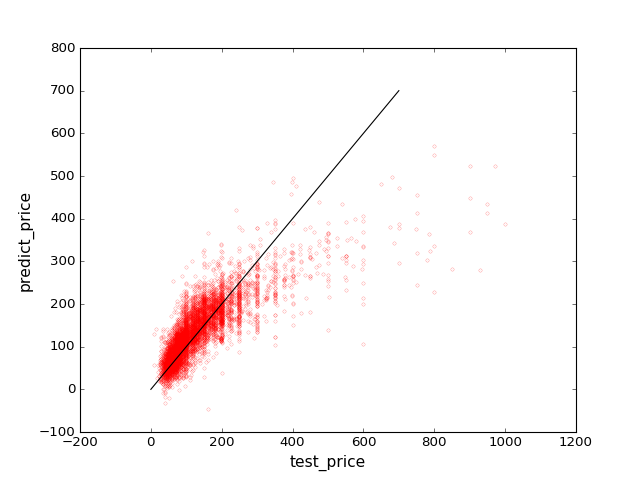

In [9]:
# Create linear regression object
regr = linear_model.Lasso(alpha = .25)

# Train the model using the training sets
regr.fit(df_X_train, df_y_train)
print('Variance score: %.2f' % regr.score(df_X_train, df_y_train))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(df_X_test) - df_y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(df_X_test, df_y_test))
plt.figure()
plt.plot([0,700], [0,700],  color='black')
plt.scatter(df_y_test, regr.predict(df_X_test), color='red',s = 0.1, alpha = 0.5,
        linewidth=3)
plt.xlabel('test_price', fontsize=14, color='black')
plt.ylabel('predict_price', fontsize=14, color='black')
plt.show()

In [10]:
#math.sqrt(np.mean((df_y_test- regr.predict(df_X_test))**2))

In [11]:
err = abs(df_y_test- regr.predict(df_X_test))
average = np.mean(err)
std = np.std(err)
ci = 2*std / np.sqrt(len(df_y_test))

In [12]:
#np.percentile(err, 95)
#np.percentile(err, 5)

In [13]:
print('average_err: %.2f' % average)
print('confidence interval: %.2f' % ci)

average_err: 38.51
confidence interval: 1.32


<IPython.core.display.Javascript object>


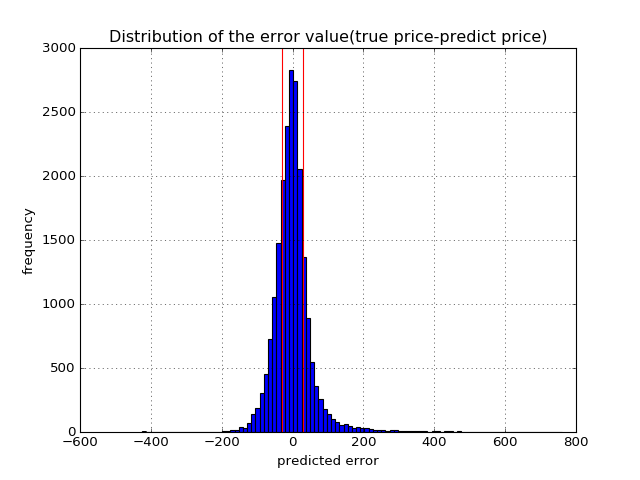

In [14]:
err = df_y_train-regr.predict(df_X_train)
plt.figure()
err.hist(bins = 100)
plt.ylabel('frequency')
plt.xlabel('predicted error')
#plt.yscale('log', nonposy='clip')
plt.title('Distribution of the error value(true price-predict price)')
plt.axvline(x = 30, color = 'r')
plt.axvline(x = -30, color = 'r')
plt.show()

In [15]:
outlier = abs(df_y_train-regr.predict(df_X_train)) > 30
new_X_train = df_X_train[-outlier]
new_y_train = df_y_train[-outlier]
new_X_train = new_X_train.reset_index(drop = True)
new_y_train = new_y_train.reset_index(drop = True)

<IPython.core.display.Javascript object>


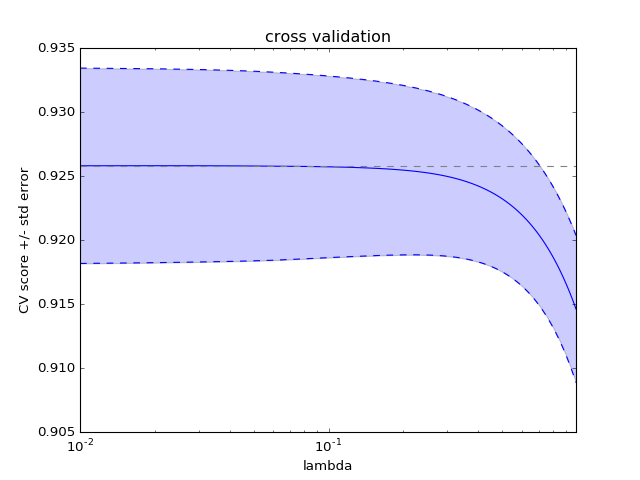

In [16]:
lasso = Lasso(random_state=0)
alphas = [i/100.0 for i in range(100)]

scores = list()
scores_std = list()

n_folds = 5

for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_val_score(lasso, new_X_train, new_y_train, cv=n_folds, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

scores, scores_std = np.array(scores), np.array(scores_std)

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + 2*std_error, 'b--')
plt.semilogx(alphas, scores - 2*std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + 2*std_error, scores - 2*std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('lambda')
plt.title('cross validation')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]]);

Variance score: 0.94
Coefficients: 
 [  5.03088052e+01   2.28410628e+01   4.07408574e-02   2.65680074e+01
   3.31701720e-01   1.74929649e+01   1.01101280e+01   3.07615586e-02
  -4.18566945e-04   2.40084072e+00   5.39552162e-01  -3.05677772e-02
   3.20856943e-04  -6.47659813e-01   2.81378947e-09  -1.79277070e-01
  -2.19979289e+00   1.42361106e+00   4.24156315e+00   4.66493697e-01]
Mean squared error: 3847.75
Variance score: 0.61


<IPython.core.display.Javascript object>


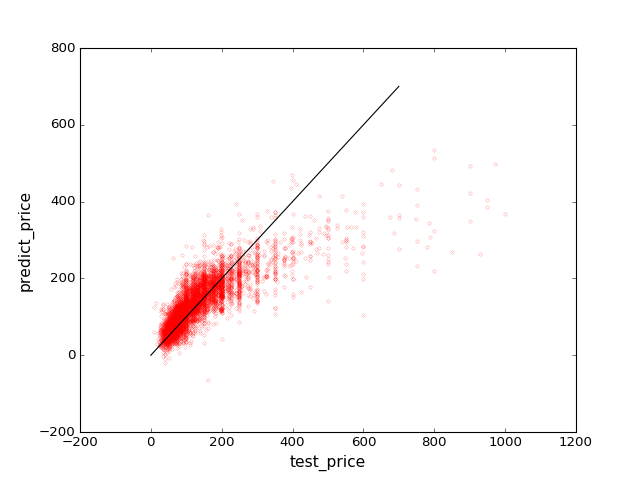

In [17]:
regr = linear_model.Lasso(alpha = .01)

# Train the model using the training sets
regr.fit(new_X_train, new_y_train)
print('Variance score: %.2f' % regr.score(new_X_train, new_y_train))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(df_X_test) - df_y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(df_X_test, df_y_test))
plt.figure()
plt.plot([0,700], [0,700],  color='black')
plt.scatter(df_y_test, regr.predict(df_X_test), color='red',s = 0.1, alpha = 0.5,
        linewidth=3)
plt.xlabel('test_price', fontsize=14, color='black')
plt.ylabel('predict_price', fontsize=14, color='black')
plt.show()

In [18]:
regr.intercept_

-221.93727764213756

In [19]:
err_train = new_y_train-regr.predict(new_X_train)
len(err_train)

12055

<IPython.core.display.Javascript object>


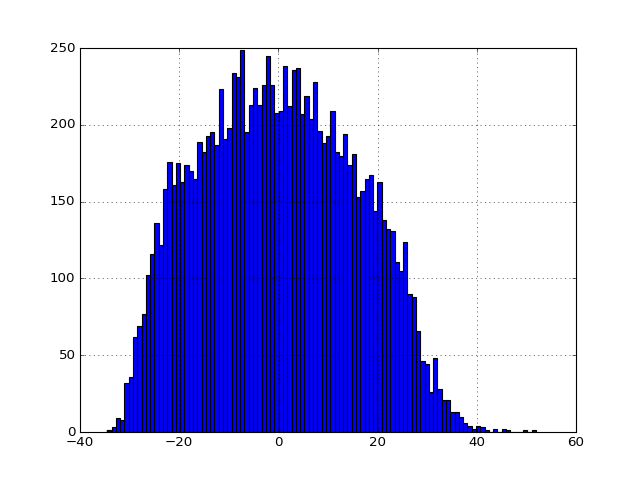

In [20]:
plt.figure()
err_train.hist(bins = 100)
plt.show()

In [21]:
df_X_train.loc[:,'out'] = 1

/Users/wannyin/anaconda/lib/python2.7/site-packages/pandas-0.19.0rc1+39.g5033a4a-py2.7-macosx-10.6-x86_64.egg/pandas/core/indexing.py:296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/wannyin/anaconda/lib/python2.7/site-packages/pandas-0.19.0rc1+39.g5033a4a-py2.7-macosx-10.6-x86_64.egg/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [22]:
df_X_train.loc[outlier,'out'] =-1

In [23]:
df_X_train.head()

,Entire home/apt,bathrooms,Zillow_Rent_Index,bedrooms,cleaning_fee,availability,accommodates,last_review_time,duration,guests_included,...,extra_people,security_deposit,beds,maximum_nights,minimum_nights,host_acceptance,host_response,review_scores_location,verification_method,out
0,0,1.0,1904,1.0,10.0,0.945205,2,21,678.0,1,...,10.0,0.0,1.0,1125,1,0.5,1.0,10.0,4,1
1,1,1.0,1904,1.0,75.0,0.920548,3,6,819.0,1,...,0.0,0.0,1.0,21,3,1.0,1.0,10.0,4,1
2,1,1.0,1904,1.0,25.0,0.835616,4,19,153.0,2,...,10.0,0.0,2.0,1125,1,1.0,1.0,10.0,4,-1
3,0,1.0,1904,1.0,17.0,0.802740,4,2,484.0,2,...,10.0,0.0,1.0,1125,1,1.0,1.0,10.0,4,1
4,1,1.0,1904,1.0,40.0,0.906849,4,25,1223.0,1,...,10.0,0.0,2.0,330,3,1.0,1.0,10.0,3,1


In [24]:
new_X = df_X_train.iloc[:,:-1]
#df_X['offset'] =1 
new_y = df_X_train.iloc[:,-1]
new_X_test = df.iloc[-int(0.2*n):,1:]

In [25]:
len(new_X_test)

5241

In [26]:
#from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=100, random_state=0).fit(new_X)
#kmeans.score(new_X)

In [27]:
#from sklearn.multiclass import OneVsRestClassifier
#from sklearn.svm import LinearSVC
#b = OneVsRestClassifier(LinearSVC(random_state=0)).fit(new_X, new_y).predict(new_X_test)

In [28]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(new_X, new_y)
model.score(new_X, new_y)
c = model.predict(new_X_test)

In [29]:
new_y_test = (c==1)

In [30]:
sum(new_y_test)

4372

In [31]:
test_set = new_X_test
test_X = test_set.iloc[:,:]
test_X = test_X[new_y_test]
#df_X['offset'] =1 
test_y = df_y_test[new_y_test]

In [32]:
test_X.head()

,Entire home/apt,bathrooms,Zillow_Rent_Index,bedrooms,cleaning_fee,availability,accommodates,last_review_time,duration,guests_included,review_scores_rating,extra_people,security_deposit,beds,maximum_nights,minimum_nights,host_acceptance,host_response,review_scores_location,verification_method
20969,0,1.0,3612,1.0,0.0,0.079452,2,115,412.0,1,100.0,0.0,0.0,1.0,1125,15,0.00,0.29,10.0,4
20970,0,1.0,3612,1.0,0.0,0.997260,1,41,1678.0,0,100.0,0.0,0.0,1.0,30,3,0.88,0.40,10.0,4
20971,0,2.0,3612,1.0,0.0,0.000000,2,106,682.0,1,95.0,0.0,0.0,1.0,1125,3,0.00,0.75,9.0,3
20972,1,1.0,3612,0.0,50.0,0.364384,4,15,1137.0,2,89.0,30.0,400.0,2.0,1125,1,0.88,0.91,9.0,3
20973,0,1.0,3612,1.0,0.0,0.586301,1,42,1079.0,1,100.0,20.0,0.0,1.0,1125,1,0.44,1.00,10.0,3


Mean squared error: 2802.93
Variance score: 0.60


<IPython.core.display.Javascript object>


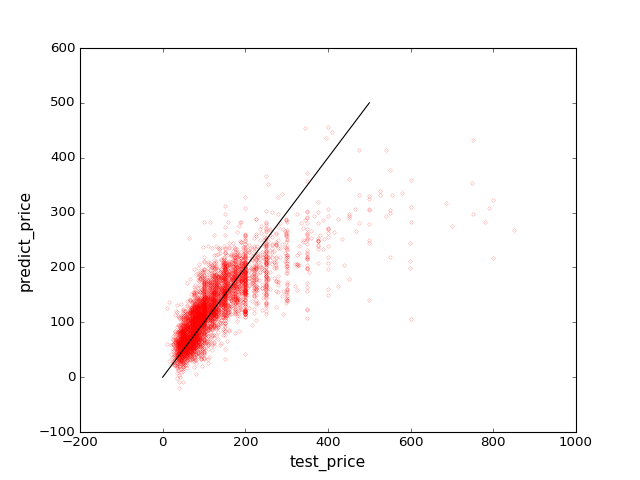

In [33]:
print("Mean squared error: %.2f"
      % np.mean((regr.predict(test_X) - test_y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_X, test_y))

plt.figure()
plt.plot([0,500], [0,500],  color='black')
plt.scatter(test_y, regr.predict(test_X), color='red',s = 0.1, alpha = 0.5,
        linewidth=3)
plt.xlabel('test_price', fontsize=14, color='black')
plt.ylabel('predict_price', fontsize=14, color='black')
plt.show()

In [34]:
#math.sqrt(np.mean((test_y - regr.predict(test_X))**2))

In [35]:
err_test = abs(test_y - regr.predict(test_X))
average_err = np.mean(err_test)
std_err = np.std(err_test)
ci = 2*std_err / np.sqrt(len(test_y))

In [36]:
print('average_err: %.2f' % average_err)
print('confidence interval: %.2f' % ci)

average_err: 33.58
confidence interval: 1.24


In [37]:
err_ci = test_y - regr.predict(test_X)

In [38]:
pred_y = regr.predict(test_X)
h_ci = [0]*501
l_ci = [0]*501
m_ci = [0]*501
axis = [0]*501
for i in range(0,501):
    if sum((pred_y - i)<1):
        axis[i] = i
        l_ci[i] = np.percentile(err_ci[(pred_y - i)<1],5)
        m_ci[i] = np.percentile(err_ci[(pred_y - i)<1],50)
        h_ci[i] = np.percentile(err_ci[(pred_y - i)<1],95)

<IPython.core.display.Javascript object>


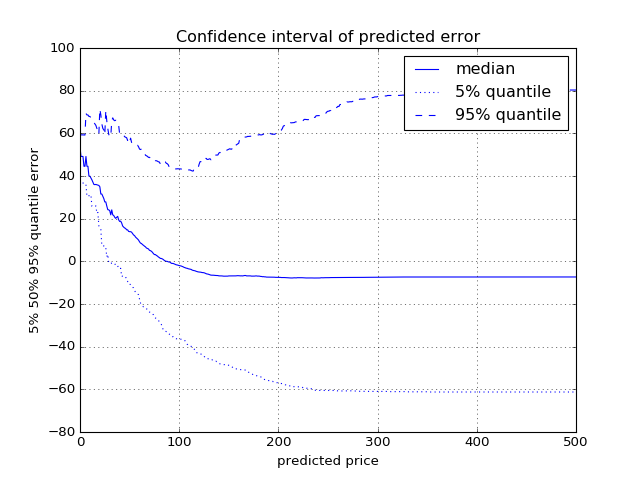

In [42]:
plt.figure()
plt.plot(axis, m_ci,label='median')

# plot error lines showing +/- std. errors of the scores

plt.plot(axis, l_ci, 'b:',label='5% quantile')
plt.plot(axis, h_ci, 'b--',label='95% quantile')

# alpha=0.2 controls the translucency of the fill color

plt.ylabel('5% 50% 95% quantile error')
plt.xlabel('predicted price')
plt.title('Confidence interval of predicted error')
plt.grid()
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


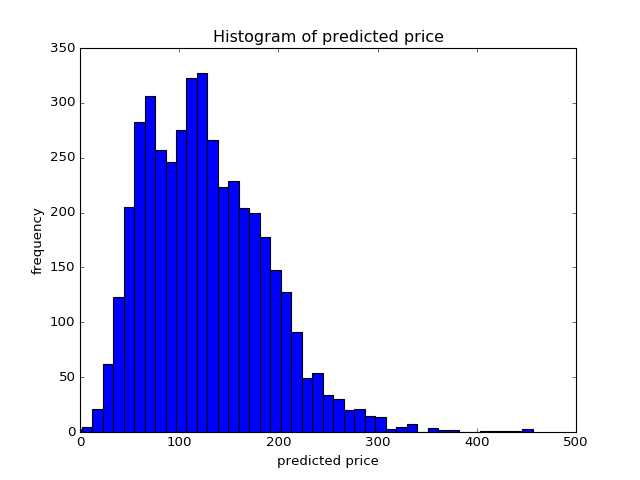

In [76]:
plt.figure()
a = np.hstack(pred_y)
plt.hist(a, bins='auto')  # plt.hist passes it's arguments to np.histogram
#plt.xscale('log')
plt.xlim(0, 500)
plt.ylabel('frequency')
plt.xlabel('predicted price')
plt.title('Histogram of predicted price')
plt.show()